In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Importing the dataset

data = pd.read_csv("C:/Users/raimu/Data Trained/DataTrained Projects/Practice Projects/Project 5/Advertising.csv")
req_data = data.copy()
new_data =req_data.drop(columns = ["Unnamed: 0"], axis = 1)
new_data +=1

In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
new_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,148.042500,24.264000,31.554000,15.022500
std,85.854236,14.846809,21.778621,5.217457
min,1.700000,1.000000,1.300000,2.600000
25%,75.375000,10.975000,13.750000,11.375000
50%,150.750000,23.900000,26.750000,13.900000
75%,219.825000,37.525000,46.100000,18.400000
max,297.400000,50.600000,115.000000,28.000000


C:\Users\raimu\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


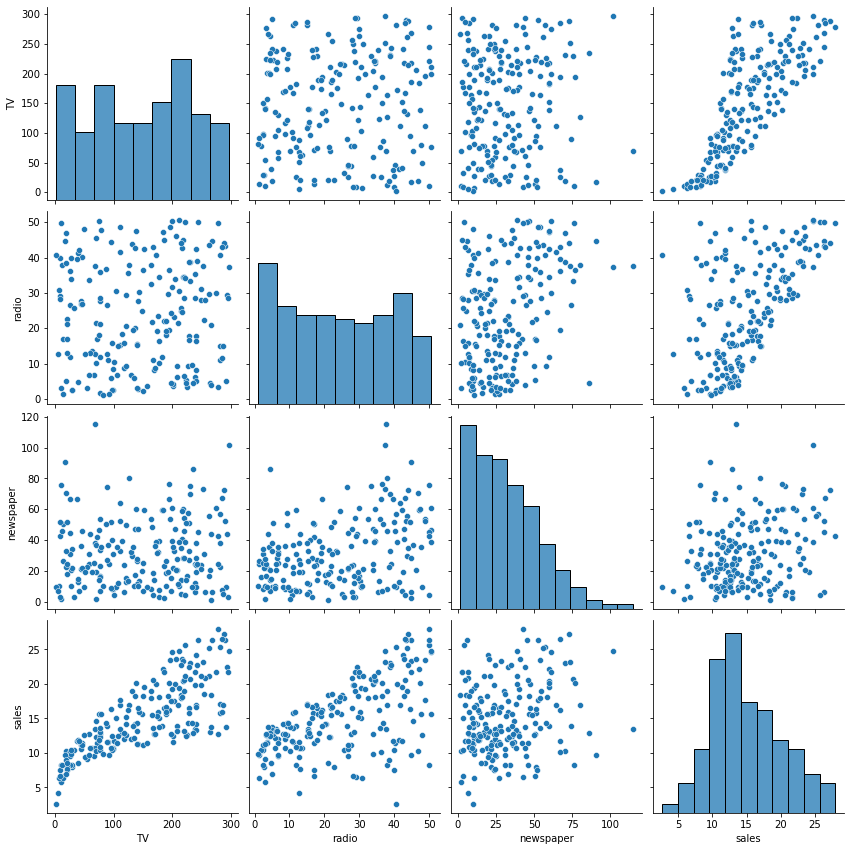

In [50]:
# Using the pairplot to understand the nature of relationship between all the variables

sns.pairplot(new_data, size = 3)
plt.show()

<AxesSubplot:>

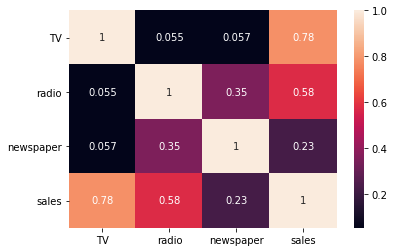

In [51]:
# Performing the correlation and heatmap of both predictors and response variable

corr = new_data.corr()

sns.heatmap(corr, annot = True)

In [54]:
# Preparing the feature varibles and target variable

feature_names = ['TV', 'radio', 'newspaper']
X = new_data[feature_names]
y = new_data['sales']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [66]:
# Performing the linear regression on the trained dataset

from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept = True)
LR.fit(X_train, y_train)

LinearRegression()

In [67]:
print(f"co-efficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

co-efficients : [0.04695205 0.17658644 0.00185115]
Intercept : 3.711826098335063


In [68]:
y_pred = LR.predict(X_test) 

In [69]:
# Calculating the various parameters under regression model

import statsmodels.api as sm

X_data = sm.add_constant(X)
mod = sm.OLS(y, X_data)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        21:15:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7056      0.318     11.643      0.0

By observing the p-value for all the independent variables - "TV" and "Radio" have p-value nearly to zero while "newspaper" has 0.86. Hence, we can infer that, TV and radio channel have significant impact on Sales while newspaper doesn't play any role in generating sales

Now, we will remove the "TV" variable and again perform the Regression model 

In [70]:
# Preparing the feature varibles and target variable

feature_names1 = ['TV', 'radio']
X = new_data[feature_names1]
y = new_data['sales']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [72]:
# Performing the linear regression on the trained dataset

from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept = True)
LR.fit(X_train, y_train)

LinearRegression()

In [73]:
print(f"co-efficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

co-efficients : [0.04697554 0.17765046]
Intercept : 3.7401411156738895


In [74]:
y_pred = LR.predict(X_test)

In [75]:
# Calculating the various parameters under regression model
import statsmodels.api as sm

X_data1 = sm.add_constant(X)
mod1 = sm.OLS(y, X_data1)
result1 = mod1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        21:39:14   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6874      0.300     12.280      0.0

**Conclusion:**
- Removing the "newspaper" variable from the data doesn't have significant effect on the model
- Nearly 90% of the sales can be determined by all the distribution channels
- On basis of t-value, we can positively say that, there is relationship between the independent and the dependent variables
- From heatmap, we can conclude - majority sales comes from the TV channel, followed by Radio